In [ ]:
!pip install kaggle

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [ ]:

!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:

from zipfile import ZipFile
dataset = '/content/drive/MyDrive/Final Assignment CVPR/data/archive.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/drive/MyDrive/Final Assignment CVPR/data/Data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3129.jpg', 'with_mask_3128.jpg', 'with_mask_3127.jpg', 'with_mask_3184.jpg', 'with_mask_3171.jpg']
['with_mask_1130.jpg', 'with_mask_1126.jpg', 'with_mask_1129.jpg', 'with_mask_113.jpg', 'with_mask_1127.jpg']


In [ ]:
without_mask_files = os.listdir('/content/drive/MyDrive/Final Assignment CVPR/data/Data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1014.jpg', 'without_mask_1013.jpg', 'without_mask_1011.jpg', 'without_mask_1012.jpg', 'without_mask_1010.jpg']
['without_mask_11.jpg', 'without_mask_110.jpg', 'without_mask_1098.jpg', 'without_mask_1102.jpg', 'without_mask_1099.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 186
Number of without mask images: 118


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

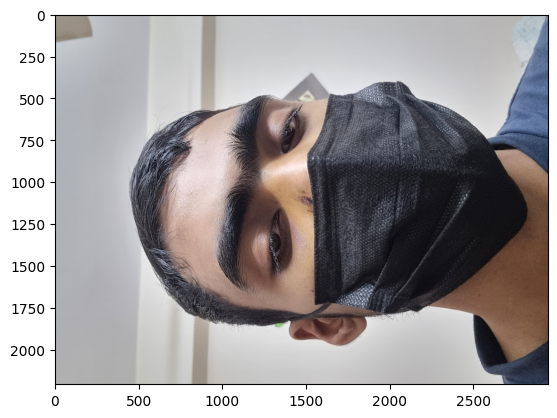

In [ ]:

img = mpimg.imread('/content/drive/MyDrive/Final Assignment CVPR/data/Data/with_mask/with_mask_18_37034_1.jpg')
imgplot = plt.imshow(img)
plt.show()

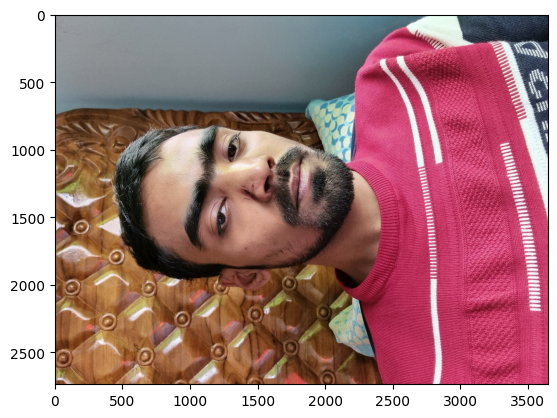

In [ ]:

img = mpimg.imread('/content/drive/MyDrive/Final Assignment CVPR/data/Data/without_mask/without _mask_18_37034_1.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:


with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

304

In [ ]:
data[0]

array([[[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [213, 229, 230],
        [213, 228, 229],
        [212, 226, 227]],

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [211, 226, 227],
        [212, 226, 227],
        [212, 226, 227]],

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [215, 232, 232],
        [216, 233, 234],
        [218, 234, 236]],

       ...,

       [[107,  53,  80],
        [108,  55,  82],
        [111,  57,  83],
        ...,
        [ 54,  25,  42],
        [ 78,  44,  63],
        [ 87,  51,  70]],

       [[107,  52,  79],
        [108,  53,  80],
        [108,  54,  81],
        ...,
        [ 62,  33,  50],
        [ 85,  49,  69],
        [ 91,  51,  71]],

       [[111,  56,  83],
        [110,  55,  82],
        [110,  54,  82],
        ...,
        [ 73,  42,  59],
        [ 75,  41,  59],
        [ 83,  45,  63]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:


X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(304, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[109, 107, 118],
        [114, 113, 121],
        [109, 107, 116],
        ...,
        [ 90,  97, 107],
        [ 90,  94, 105],
        [ 93,  97, 108]],

       [[110, 108, 119],
        [111, 108, 117],
        [110, 105, 114],
        ...,
        [ 86,  93, 103],
        [ 88,  92, 103],
        [ 89,  93, 104]],

       [[112, 107, 118],
        [113, 109, 118],
        [123, 117, 125],
        ...,
        [ 89,  95, 105],
        [ 91,  95, 106],
        [ 87,  91, 102]],

       ...,

       [[ 46,  66,  91],
        [ 45,  65,  90],
        [ 47,  67,  92],
        ...,
        [177, 143, 123],
        [176, 144, 123],
        [177, 145, 124]],

       [[ 49,  69,  93],
        [ 47,  67,  91],
        [ 46,  66,  90],
        ...,
        [179, 146, 126],
        [178, 146, 125],
        [177, 146, 125]],

       [[ 43,  63,  87],
        [ 43,  63,  87],
        [ 44,  64,  88],
        ...,
        [179, 147, 126],
        [177, 145, 124],
        [175, 144, 123]]

In [ ]:
X_train_scaled[0]

array([[[0.42745098, 0.41960784, 0.4627451 ],
        [0.44705882, 0.44313725, 0.4745098 ],
        [0.42745098, 0.41960784, 0.45490196],
        ...,
        [0.35294118, 0.38039216, 0.41960784],
        [0.35294118, 0.36862745, 0.41176471],
        [0.36470588, 0.38039216, 0.42352941]],

       [[0.43137255, 0.42352941, 0.46666667],
        [0.43529412, 0.42352941, 0.45882353],
        [0.43137255, 0.41176471, 0.44705882],
        ...,
        [0.3372549 , 0.36470588, 0.40392157],
        [0.34509804, 0.36078431, 0.40392157],
        [0.34901961, 0.36470588, 0.40784314]],

       [[0.43921569, 0.41960784, 0.4627451 ],
        [0.44313725, 0.42745098, 0.4627451 ],
        [0.48235294, 0.45882353, 0.49019608],
        ...,
        [0.34901961, 0.37254902, 0.41176471],
        [0.35686275, 0.37254902, 0.41568627],
        [0.34117647, 0.35686275, 0.4       ]],

       ...,

       [[0.18039216, 0.25882353, 0.35686275],
        [0.17647059, 0.25490196, 0.35294118],
        [0.18431373, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 24ms/step - loss: 0.4886 - acc: 0.7848 - val_loss: 0.3200 - val_acc: 0.8711
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2937 - acc: 0.8847 - val_loss: 0.2501 - val_acc: 0.9008
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2523 - acc: 0.9016 - val_loss: 0.2516 - val_acc: 0.8992
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1970 - acc: 0.9270 - val_loss: 0.2292 - val_acc: 0.9256
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1810 - acc: 0.9308 - val_loss: 0.2427 - val_acc: 0.9074


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2065 - acc: 0.9219
Test Accuracy = 0.9219059944152832


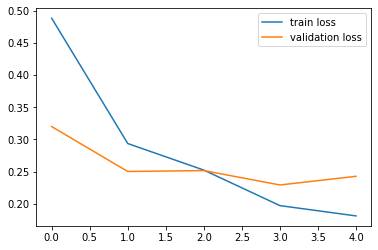

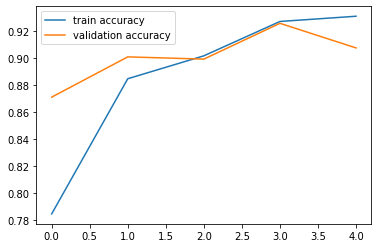

In [ ]:
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test.jpg


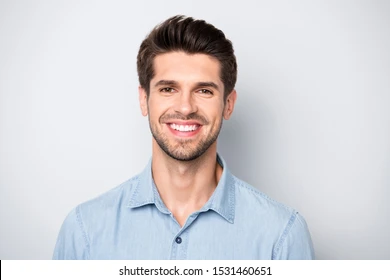

1/1 [==============================] - 0s 21ms/step
[[0.49811754 0.47740024]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')